## Calculating the chi-square for a distribution and a histogram.

We will do it two ways. With and without normalized histograms

In [151]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


### make some data from a N(0,1) distribution

In [152]:
n_bins = 50
x = norm.rvs(size=10000)

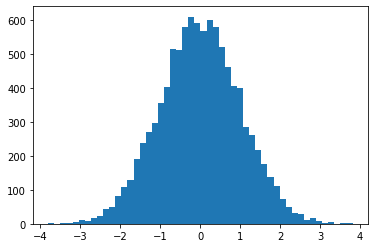

In [153]:
counts, bins, patches = plt.hist(x, bins=n_bins,density=False)

## Get Bin centers

Get the location for the bin centers. Here I do it step by step so you can see what is going on.

In [154]:
# all bins edges
bins

array([-3.80208188, -3.64968941, -3.49729694, -3.34490446, -3.19251199,
       -3.04011952, -2.88772705, -2.73533458, -2.58294211, -2.43054964,
       -2.27815717, -2.12576469, -1.97337222, -1.82097975, -1.66858728,
       -1.51619481, -1.36380234, -1.21140987, -1.0590174 , -0.90662493,
       -0.75423245, -0.60183998, -0.44944751, -0.29705504, -0.14466257,
        0.0077299 ,  0.16012237,  0.31251484,  0.46490732,  0.61729979,
        0.76969226,  0.92208473,  1.0744772 ,  1.22686967,  1.37926214,
        1.53165461,  1.68404708,  1.83643956,  1.98883203,  2.1412245 ,
        2.29361697,  2.44600944,  2.59840191,  2.75079438,  2.90318685,
        3.05557933,  3.2079718 ,  3.36036427,  3.51275674,  3.66514921,
        3.81754168])

In [155]:
right_edges = bins[1:]
right_edges

array([-3.64968941, -3.49729694, -3.34490446, -3.19251199, -3.04011952,
       -2.88772705, -2.73533458, -2.58294211, -2.43054964, -2.27815717,
       -2.12576469, -1.97337222, -1.82097975, -1.66858728, -1.51619481,
       -1.36380234, -1.21140987, -1.0590174 , -0.90662493, -0.75423245,
       -0.60183998, -0.44944751, -0.29705504, -0.14466257,  0.0077299 ,
        0.16012237,  0.31251484,  0.46490732,  0.61729979,  0.76969226,
        0.92208473,  1.0744772 ,  1.22686967,  1.37926214,  1.53165461,
        1.68404708,  1.83643956,  1.98883203,  2.1412245 ,  2.29361697,
        2.44600944,  2.59840191,  2.75079438,  2.90318685,  3.05557933,
        3.2079718 ,  3.36036427,  3.51275674,  3.66514921,  3.81754168])

In [156]:
left_edges = bins[:-1]
left_edges

array([-3.80208188, -3.64968941, -3.49729694, -3.34490446, -3.19251199,
       -3.04011952, -2.88772705, -2.73533458, -2.58294211, -2.43054964,
       -2.27815717, -2.12576469, -1.97337222, -1.82097975, -1.66858728,
       -1.51619481, -1.36380234, -1.21140987, -1.0590174 , -0.90662493,
       -0.75423245, -0.60183998, -0.44944751, -0.29705504, -0.14466257,
        0.0077299 ,  0.16012237,  0.31251484,  0.46490732,  0.61729979,
        0.76969226,  0.92208473,  1.0744772 ,  1.22686967,  1.37926214,
        1.53165461,  1.68404708,  1.83643956,  1.98883203,  2.1412245 ,
        2.29361697,  2.44600944,  2.59840191,  2.75079438,  2.90318685,
        3.05557933,  3.2079718 ,  3.36036427,  3.51275674,  3.66514921])

In [157]:
bin_centers = (right_edges+left_edges)/2
bin_centers

array([-3.72588564, -3.57349317, -3.4211007 , -3.26870823, -3.11631576,
       -2.96392329, -2.81153082, -2.65913834, -2.50674587, -2.3543534 ,
       -2.20196093, -2.04956846, -1.89717599, -1.74478352, -1.59239105,
       -1.43999857, -1.2876061 , -1.13521363, -0.98282116, -0.83042869,
       -0.67803622, -0.52564375, -0.37325128, -0.22085881, -0.06846633,
        0.08392614,  0.23631861,  0.38871108,  0.54110355,  0.69349602,
        0.84588849,  0.99828096,  1.15067344,  1.30306591,  1.45545838,
        1.60785085,  1.76024332,  1.91263579,  2.06502826,  2.21742073,
        2.36981321,  2.52220568,  2.67459815,  2.82699062,  2.97938309,
        3.13177556,  3.28416803,  3.4365605 ,  3.58895297,  3.74134545])

In [158]:
bin_width = bins[1]-bins[0]

## Raw histogram counts

To go from the pdf to the expected counts in a bin, you need to include a normalization constant.

In [159]:
normalization = x.size*(bins[1]-bins[0])

In [160]:
prediction = normalization*norm.pdf(bin_centers)

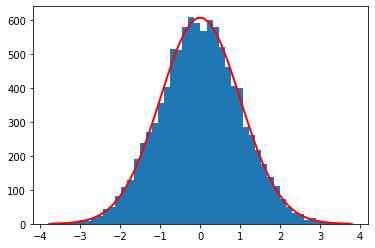

In [161]:
counts, bins, patches = plt.hist(x, bins=n_bins,density=False)
plt.plot(bin_centers,prediction, c='r', lw=2)

In [162]:
np.sum(prediction), np.sum(counts)

(9998.629216214442, 10000.0)

Text(0.5, 0, '(counts-prediction)/sqrt(prediction)')

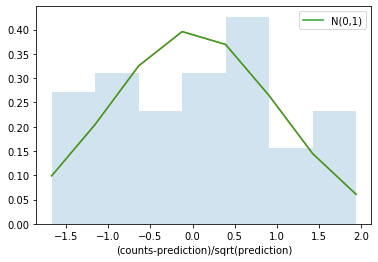

In [163]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts-prediction)/np.sqrt(prediction), bins=7, density=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]))
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1)')
plt.legend()
plt.xlabel('(counts-prediction)/sqrt(prediction)')

## Chisquare

In [164]:
from scipy.stats import chisquare

In [165]:
from scipy.stats import chi2

In [166]:
# right way
np.sum((counts-prediction)**2/prediction)

47.44489032311755

In [167]:
# right way
chisq_obs, pvalue = chisquare(counts, prediction)
chisq_obs, pvalue

(47.44489032311755, 0.5363314422017861)

Now we can calculate the p-value for having a chi-square value this large.
Importantly we need to have the number of degrees of freedom be the number of bins.

In [168]:
#p-value
chi2.sf(chisq_obs,counts.size)

0.5765131011412187

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5

## Normalized Histogram (wrong way)

Here we make a normed histogram, which is equivalent to dividing by the normalization constant

In [20]:
prediction_normed = norm.pdf(bin_centers)

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


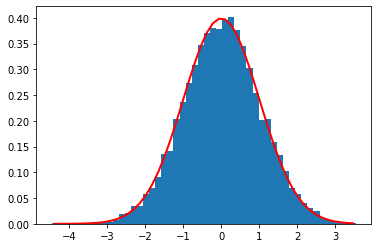

In [21]:
counts_normed, bins, patches = plt.hist(x, bins=n_bins,normed=True)
plt.plot(bin_centers,prediction_normed, c='r', lw=2)

In [22]:
# Note, they don't add up to 1., they add up to (roughly) 1/bin_width
np.sum(prediction_normed), np.sum(counts_normed)

(6.243036009672379, 6.244273944181589)

In [23]:
1/bin_width

6.244273944181598

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'note, the scale is way off!!!')

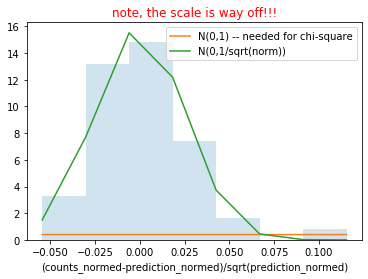

In [24]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts_normed-prediction_normed)/np.sqrt(prediction_normed), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1) -- needed for chi-square')
plt.plot(temp[1], norm.pdf(temp[1], 0,1./np.sqrt(normalization)), label='N(0,1/sqrt(norm))')
plt.legend()
plt.xlabel('(counts_normed-prediction_normed)/sqrt(prediction_normed)')
plt.title('note, the scale is way off!!!', color='r')

In [25]:
#wrong way
np.sum((counts_normed-prediction_normed)**2/prediction_normed)

0.042149255491007204

In [26]:
#wrong way
chisq_obs_wrong, pvalue_wrong = chisquare(counts_normed, prediction_normed)
chisq_obs_wrong, pvalue_wrong

(0.042149255491007204, 1.0)

In [27]:
## compare with the right way
chisq_obs, pvalue

(67.50065078467904, 0.04089793161889964)

In [28]:
#p-value
chi2.sf(chisq_obs_wrong,counts.size)

1.0

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5